<a href="https://colab.research.google.com/github/noureldinmo/codealpha_tasks/blob/main/MUSIC_RECOMMDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

In [ ]:
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Drop unnecessary columns
data.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'time_signature', 'track_genre'], axis=1, inplace=True)

# Handle missing values if any
data.dropna(inplace=True)

In [ ]:
# Step 4: Split the data into features and target
X = data.drop('popularity', axis=1)
y = data['popularity']

In [ ]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape features for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [ ]:
# Step 7: Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])

In [ ]:
# Step 8: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
# Step 9: Train the model
model.fit(X_train_reshaped, y_train, batch_size=32, epochs=100, validation_data=(X_test_reshaped, y_test))


Epoch 1/100
2850/2850 [==============================] - 25s 7ms/step - loss: 540.7504 - val_loss: 493.9768
Epoch 2/100
2850/2850 [==============================] - 18s 6ms/step - loss: 498.6185 - val_loss: 493.5796
Epoch 3/100
2850/2850 [==============================] - 19s 7ms/step - loss: 498.6493 - val_loss: 493.7495
Epoch 4/100
2850/2850 [==============================] - 17s 6ms/step - loss: 498.5988 - val_loss: 493.5805
Epoch 5/100
2850/2850 [==============================] - 17s 6ms/step - loss: 498.7354 - val_loss: 493.4817
Epoch 6/100
2850/2850 [==============================] - 19s 7ms/step - loss: 498.7316 - val_loss: 493.3896
Epoch 7/100
2850/2850 [==============================] - 17s 6ms/step - loss: 494.6212 - val_loss: 484.7390
Epoch 8/100
2850/2850 [==============================] - 21s 8ms/step - loss: 487.0542 - val_loss: 483.5154
Epoch 9/100
2850/2850 [==============================] - 20s 7ms/step - loss: 484.2571 - val_loss: 478.7172
Epoch 10/100
2850/2850 [====

In [ ]:
# Step 10: Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)

713/713 [==============================] - 2s 3ms/step - loss: 385.3893
Test Loss: 385.3893127441406


In [ ]:
from sklearn.metrics import mean_squared_error

# Step 10: Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss (MSE):", loss)

# Predict on test data
y_pred = model.predict(X_test_reshaped)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

713/713 [==============================] - 3s 4ms/step - loss: 385.3893
Test Loss (MSE): 385.3893127441406
713/713 [==============================] - 3s 3ms/step
Mean Squared Error (MSE): 385.38938107485785


In [ ]:
# Calculate the mean popularity score in the training set
mean_popularity = y_train.mean()

# Create an array of the same length as the test set with the mean popularity score
baseline_predictions = np.full_like(y_test, fill_value=mean_popularity)

# Calculate the MSE of the baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)

print("Mean Squared Error (MSE) of the Baseline Model:", baseline_mse)

# Compare the MSE of your model to the baseline model
if mse < baseline_mse:
    print("The model performs better than the baseline.")
elif mse == baseline_mse:
    print("The model performs equally to the baseline.")
else:
    print("The model performs worse than the baseline.")


Mean Squared Error (MSE) of the Baseline Model: 493.4852192982456
The model performs better than the baseline.


Epoch 1/10
2850/2850 [==============================] - 18s 6ms/step - loss: 289.1977 - val_loss: 382.6381
Epoch 2/10
2850/2850 [==============================] - 18s 6ms/step - loss: 288.5934 - val_loss: 385.1020
Epoch 3/10
2850/2850 [==============================] - 19s 7ms/step - loss: 288.4671 - val_loss: 385.8304
Epoch 4/10
2850/2850 [==============================] - 19s 7ms/step - loss: 286.4026 - val_loss: 381.2301
Epoch 5/10
2850/2850 [==============================] - 18s 6ms/step - loss: 285.9544 - val_loss: 387.3301
Epoch 6/10
2850/2850 [==============================] - 19s 7ms/step - loss: 285.4837 - val_loss: 387.4831
Epoch 7/10
2850/2850 [==============================] - 17s 6ms/step - loss: 283.7992 - val_loss: 382.4757
Epoch 8/10
2850/2850 [==============================] - 17s 6ms/step - loss: 284.1897 - val_loss: 384.5840
Epoch 9/10
2850/2850 [==============================] - 18s 6ms/step - loss: 282.7011 - val_loss: 379.2046
Epoch 10/10
2850/2850 [==============

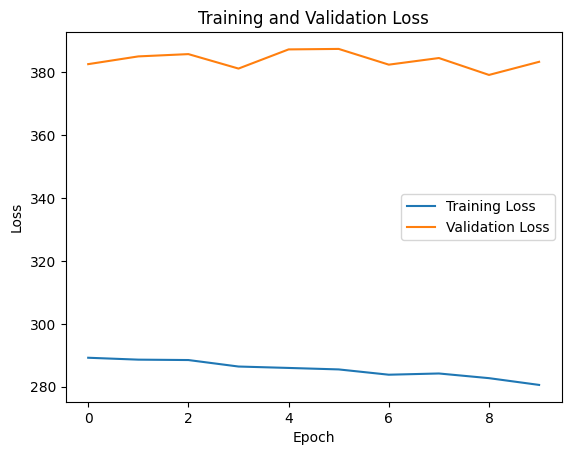

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_reshaped, y_train, batch_size=32, epochs=10,
                    validation_data=(X_test_reshaped, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


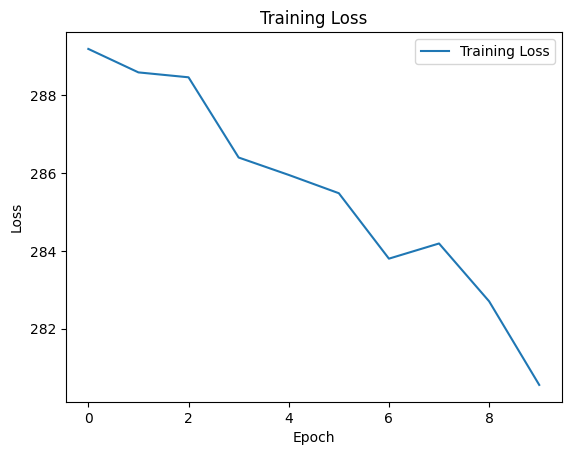

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
